In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px
import matplotlib.animation as animation

In [7]:
path = 'thermal data.xlsx'
df =pd.read_excel(path,
                  engine = 'openpyxl'
                 )
df.head(2)

,TimeStemp,camA400IR->tandem1.Min,TimeStemp.1,camA400IR->tandem1.Max,TimeStemp.2,camA400IR->tandem1.Avg
0,13:13:44.800000,18.7,13:13:44.800000,24.7,13:13:44.800000,20.4
1,13:13:45.500000,18.9,13:13:45.500000,23.8,13:13:45.500000,20.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeStemp                16960 non-null  object 
 1   camA400IR->tandem1.Min   16960 non-null  float64
 2   TimeStemp.1              16960 non-null  object 
 3   camA400IR->tandem1.Max   16960 non-null  float64
 4   TimeStemp.2              16960 non-null  object 
 5   camA400IR->tandem1.Avg   16960 non-null  float64
dtypes: float64(3), object(3)
memory usage: 795.1+ KB


In [9]:
df.drop(['TimeStemp', 'TimeStemp.2', ],
        axis = 1,
        inplace = True
        )

In [10]:
df.rename(columns={'camA400IR->tandem1.Min ' : 'TempMin', 'camA400IR->tandem1.Max ' : 'TempMax', 'camA400IR->tandem1.Avg ' : 'TempAvg' , 'TimeStemp.1' : 'Time' ,},
          inplace = True
         )

In [11]:
df = df[['Time', 'TempMin', 'TempAvg', 'TempMax' ]]

In [12]:
df.head(2)

,Time,TempMin,TempAvg,TempMax
0,13:13:44.800000,18.7,20.4,24.7
1,13:13:45.500000,18.9,20.4,23.8


In [13]:
indexNames = df[ (df['TempMax'] >= 10) & (df['TempMax'] <= 90) ].index
df.drop(indexNames , inplace=True)

In [14]:
all(isinstance(column, str) for column in df.columns)

True

In [15]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


In [16]:
df.sort_values(['Time'], ascending=True, axis=0, inplace=True)

In [17]:
df.head(2)

,Time,TempMin,TempAvg,TempMax
2473,13:22:00.400000,18.9,21.5,239.2
2474,13:22:00.500000,18.9,22.3,242.4


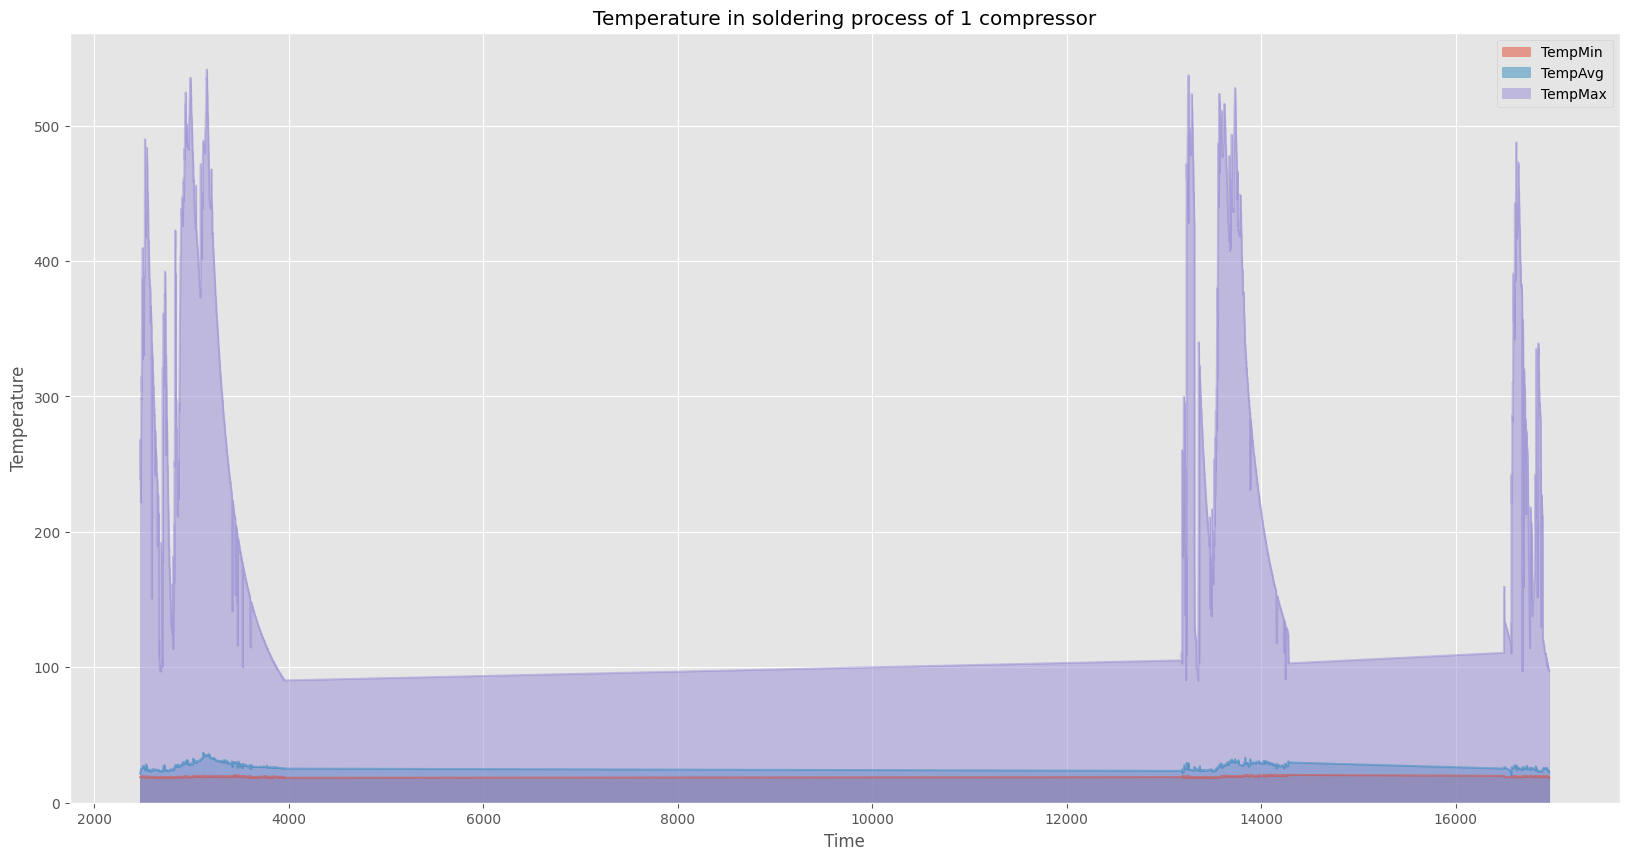

In [18]:
df.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Temperature in soldering process of 1 compressor')
plt.ylabel('Temperature')
plt.xlabel('Time')

plt.show()

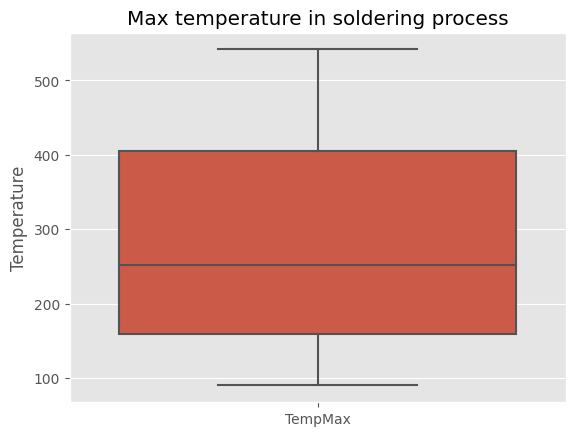

In [19]:
sns.boxplot ( data = df.loc[ :, ['Time', 'TempMax']
                           ]
            )

plt.xticks( fontsize = 10,
           rotation = 0)
plt.title('Max temperature in soldering process')
plt.ylabel('Temperature')
plt.show(block = True)


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Vertical lines Temperature limits')

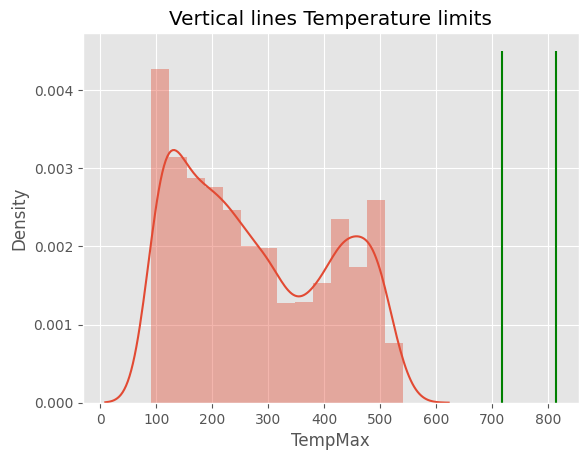

In [20]:
sns.distplot (df.TempMax)
#plt.vlines('TempMax', [0], .0)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
plt.vlines([718,815], 0, .0045, colors='g')
plt.title('Vertical lines Temperature limits')

Text(0.5, 0, 'Temperature')

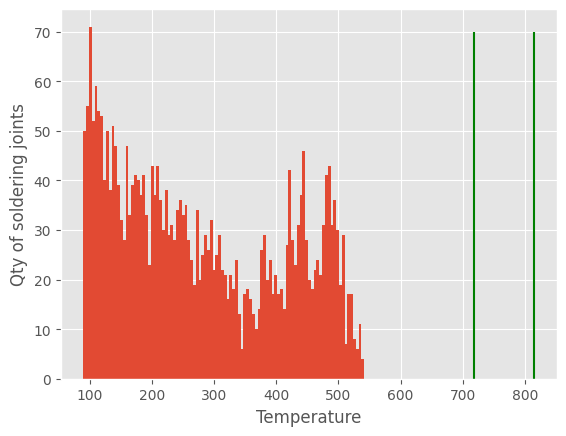

In [24]:
plt.hist(df['TempMax'], bins=100)
plt.vlines([718,815], 0, 70, colors='g')
plt.ylabel('Qty of soldering joints')
plt.xlabel('Temperature')

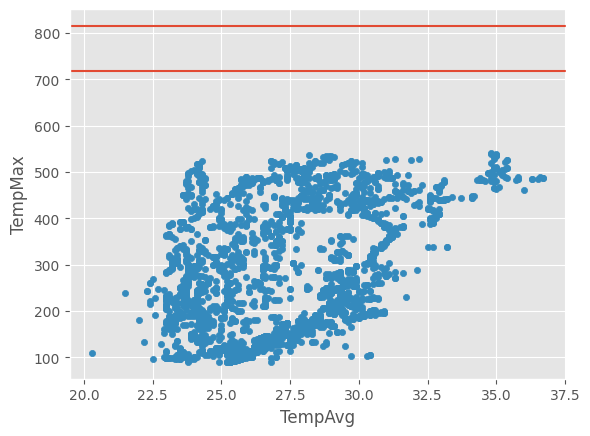

In [22]:
ax = df.plot.scatter(x="TempAvg", y="TempMax")
plt.axhline(718)
plt.axhline(815)